<a href="https://colab.research.google.com/github/s-jainr/deep-learning-sp23/blob/main/Copy_of_AveryChen_AstridZhao_RahulJain_DLProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Milestone 1


In [1]:
!pip install pytreebank
import pytreebank


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn import preprocessing

In [3]:
# Keras imports : model, layers, optimizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, Flatten, Dropout
from tensorflow.keras.initializers import HeNormal
from tensorflow.keras.callbacks import EarlyStopping

In [4]:
# load dataset: a dataset capturing fine-grained sentiment over movie reviews
# https://pypi.org/project/pytreebank/
dataset = pytreebank.load_sst("/path/to/sentiment/")

In [5]:
!pip install gensim
from gensim.parsing.preprocessing import remove_stopwords

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [6]:
# test
dataset = pytreebank.load_sst()
example = dataset["train"][0]

# extract spans from the tree.
for label, sentence in example.to_labeled_lines():
	print("%s has sentiment label %s" % (
		sentence,
		["very negative", "negative", "neutral", "positive", "very positive"][label]
	))

The Rock is destined to be the 21st Century 's new `` Conan '' and that he 's going to make a splash even greater than Arnold Schwarzenegger , Jean-Claud Van Damme or Steven Segal . has sentiment label positive
The Rock has sentiment label neutral
The has sentiment label neutral
Rock has sentiment label neutral
is destined to be the 21st Century 's new `` Conan '' and that he 's going to make a splash even greater than Arnold Schwarzenegger , Jean-Claud Van Damme or Steven Segal . has sentiment label very positive
is destined to be the 21st Century 's new `` Conan '' and that he 's going to make a splash even greater than Arnold Schwarzenegger , Jean-Claud Van Damme or Steven Segal has sentiment label positive
is has sentiment label neutral
destined to be the 21st Century 's new `` Conan '' and that he 's going to make a splash even greater than Arnold Schwarzenegger , Jean-Claud Van Damme or Steven Segal has sentiment label very positive
destined has sentiment label neutral
to be the 

In [7]:
train_data = pytreebank.import_tree_corpus("/path/to/sentiment/train.txt")
validation_data = pytreebank.import_tree_corpus("/path/to/sentiment/dev.txt")
test_data = pytreebank.import_tree_corpus("/path/to/sentiment/test.txt")

Preprocess the text to remove any irrelevant or sensitive information, such as email headers or personally identifiable information. This can also involve stop-word removal.

In [8]:
import string


In [9]:
# words2 = ""
# for i in range(len(train_data)):
#   for label, sentence in train_data[i].to_labeled_lines():
#     new_sentence = remove_stopwords(sentence)
#     new_sentence = new_sentence.translate(str.maketrans('', '', string.punctuation))
#     words2 += new_sentence

# print(len(words2))

# words = ""
# for i in range(len(train_data)):
#   for label, sentence in train_data[i].to_labeled_lines():
#     # words += sentence
#     new_sentence = remove_stopwords(sentence)
#     # new_sentence = new_sentence.translate(str.maketrans('', '', string.punctuation))
#     words += new_sentence

# print(len(words))

In [10]:
# X_train 
# Y_train
# X_validation
# Y_validation
# X_test
# Y_test


X_train = []
Y_train = []

for i in range(len(train_data)):
  for label, sentence in train_data[i].to_labeled_lines():

    sentence = remove_stopwords(sentence)
    sentence = sentence.translate(str.maketrans('', '', string.punctuation))

    if sentence == '':
      break

    # if sentence.strip() == X_train[-1]:
    #   break

    X_train.append(sentence)
    Y_train.append(label)

X_validation = []
Y_validation = []
for i in range(len(validation_data)):
  for label, sentence in validation_data[i].to_labeled_lines():

    sentence = remove_stopwords(sentence)
    sentence = sentence.translate(str.maketrans('', '', string.punctuation))

    X_validation.append(sentence)
    Y_validation.append(label)

X_test = []
Y_test = []
for i in range(len(test_data)):
  for label, sentence in test_data[i].to_labeled_lines():

    sentence = remove_stopwords(sentence)
    sentence = sentence.translate(str.maketrans('', '', string.punctuation))

    X_test.append(sentence)
    Y_test.append(label)

In [11]:
# for i in range(1):
#   print(train_data[i].to_labeled_lines())


X_train = np.array(X_train)
for i in range(10):
  print(X_train[i])

The Rock destined 21st Century s new  Conan  s going splash greater Arnold Schwarzenegger  JeanClaud Van Damme Steven Segal 
The Rock
The
Rock
destined 21st Century s new  Conan  s going splash greater Arnold Schwarzenegger  JeanClaud Van Damme Steven Segal 
destined 21st Century s new  Conan  s going splash greater Arnold Schwarzenegger  JeanClaud Van Damme Steven Segal
The gorgeously elaborate continuation  The Lord Rings  trilogy huge column words adequately cowriterdirector Peter Jackson s expanded vision JRR Tolkien s Middleearth 
The gorgeously elaborate continuation  The Lord Rings  trilogy
The gorgeously elaborate continuation
The


In [12]:
import pandas as pd

unique_words = []
for sent in X_train: unique_words += sent.lower().split()
unique_words = sorted(set(unique_words))
word_indices = dict((c, i) for i, c in enumerate(unique_words))

vectors = []
for i in range(X_train.shape[0]):
  v = np.zeros(len(unique_words))
  
  for word in X_train[i].lower().split():
    v[word_indices[word]] = 1

  vectors.append(v)

(array([1.2000e+01, 2.0009e+04, 0.0000e+00, 7.2780e+03, 0.0000e+00,
        5.0830e+03, 0.0000e+00, 4.0550e+03, 0.0000e+00, 3.2310e+03,
        0.0000e+00, 2.8620e+03, 2.4080e+03, 0.0000e+00, 2.0050e+03,
        0.0000e+00, 1.8580e+03, 0.0000e+00, 1.5990e+03, 0.0000e+00,
        1.3320e+03, 0.0000e+00, 1.0720e+03, 0.0000e+00, 9.0800e+02,
        7.0500e+02, 0.0000e+00, 5.4600e+02, 0.0000e+00, 4.1300e+02,
        0.0000e+00, 3.1600e+02, 0.0000e+00, 2.5400e+02, 0.0000e+00,
        2.1500e+02, 0.0000e+00, 1.1300e+02, 8.4000e+01, 0.0000e+00,
        6.3000e+01, 0.0000e+00, 3.0000e+01, 0.0000e+00, 2.0000e+01,
        0.0000e+00, 2.0000e+01, 0.0000e+00, 4.0000e+00, 5.0000e+00]),
 array([ 0.  ,  0.54,  1.08,  1.62,  2.16,  2.7 ,  3.24,  3.78,  4.32,
         4.86,  5.4 ,  5.94,  6.48,  7.02,  7.56,  8.1 ,  8.64,  9.18,
         9.72, 10.26, 10.8 , 11.34, 11.88, 12.42, 12.96, 13.5 , 14.04,
        14.58, 15.12, 15.66, 16.2 , 16.74, 17.28, 17.82, 18.36, 18.9 ,
        19.44, 19.98, 20.52, 21.06

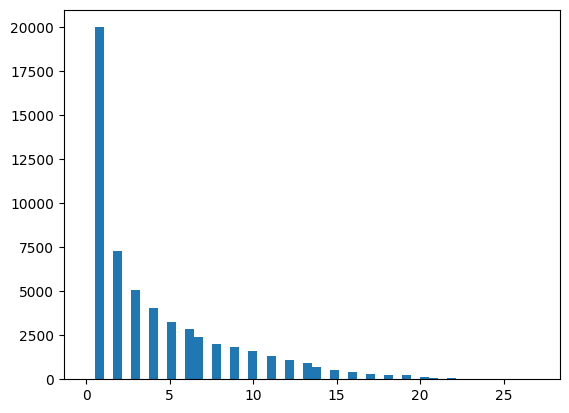

In [13]:
import matplotlib.pyplot as plt

lengths = [len(x.split()) for x in X_train]
plt.hist(lengths, bins=50)

In [14]:
len(vectors[0])

16361

In [15]:
one_hot = pd.get_dummies(Y_train)

for i in range(one_hot.shape[1]):
  print(f'instances of class {i}: {np.sum(one_hot[i])}')

instances of class 0: 3105
instances of class 1: 9051
instances of class 2: 28870
instances of class 3: 11260
instances of class 4: 4214


In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.layers import LSTM
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import RMSprop

In [17]:
model = Sequential()
model.add(LSTM(128, input_shape=(56500, 16361)))
model.add(Dense(len(unique_words)))
model.add(Activation('softmax'))
model.add(Dense(1, activation="sigmoid"))

optimizer = RMSprop(learning_rate=0.01)
model.compile(loss='binary_crossentropy', optimizer=optimizer)

In [18]:
es = EarlyStopping(patience=5, monitor='accuracy')

In [19]:
import tensorflow as tf

class CustomDataGen(tf.keras.utils.Sequence):
    
    def __init__(self, df, X_col, y_col,
                 batch_size,
                 input_size=(224, 224, 3),
                 shuffle=False):
        
        self.df = df.copy()
        self.X_col = X_col
        self.y_col = y_col
        self.batch_size = batch_size
        self.input_size = input_size
        self.shuffle = shuffle
        
        self.n = len(self.df)
        self.n_name = df[y_col['name']].nunique()
        self.n_type = df[y_col['type']].nunique()
    
    def on_epoch_end(self):
        if self.shuffle:
            self.df = self.df.sample(frac=1).reset_index(drop=True)
    
    def __get_input(self, path, bbox, target_size):
    
        xmin, ymin, w, h = bbox['x'], bbox['y'], bbox['width'], bbox['height']

        image = tf.keras.preprocessing.image.load_img(path)
        image_arr = tf.keras.preprocessing.image.img_to_array(image)

        image_arr = image_arr[ymin:ymin+h, xmin:xmin+w]
        image_arr = tf.image.resize(image_arr,(target_size[0], target_size[1])).numpy()

        return image_arr/255.
    
    def __get_output(self, label, num_classes):
        return tf.keras.utils.to_categorical(label, num_classes=num_classes)
    
    def __get_data(self, batches):
        # Generates data containing batch_size samples

        path_batch = batches[self.X_col['path']]
        bbox_batch = batches[self.X_col['bbox']]
        
        name_batch = batches[self.y_col['name']]
        type_batch = batches[self.y_col['type']]

        X_batch = np.asarray([self.__get_input(x, y, self.input_size) for x, y in zip(path_batch, bbox_batch)])

        y0_batch = np.asarray([self.__get_output(y, self.n_name) for y in name_batch])
        y1_batch = np.asarray([self.__get_output(y, self.n_type) for y in type_batch])

        return X_batch, tuple([y0_batch, y1_batch])
    
    def __getitem__(self, index):
        
        batches = self.df[index * self.batch_size:(index + 1) * self.batch_size]
        X, y = self.__get_data(batches)        
        return X, y
    
    def __len__(self):
        return self.n // self.batch_size

Everything below is still crashing :( 

Trying to get it up and running ASAP

In [20]:
# X_gen = CustomDataGen(pd.DataFrame(vectors), None, None, 32, input_size=(56500, 16361))
# Y_gen = CustomDataGen(pd.DataFrame(Y_train), None, None, 32, input_sie=(56500,))

# network_history = model.fit(X_gen, Y_gen, 
#                             validation_data=(X_validation,Y_validation),
#                             batch_size=128,                             
#                             epochs=1000, 
#                             verbose=1, 
#                             callbacks=[es])